In [17]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import folium
from folium import plugins
%matplotlib inline

In [18]:
df_orders = pd.read_csv("olist_orders_dataset.csv")

In [19]:
df_items = pd.read_csv("olist_order_items_dataset.csv")

In [20]:
df_products = pd.read_csv("olist_products_dataset.csv")

In [21]:
df_compras = pd.merge(df_items,df_products,how="left",left_on="product_id",right_on="product_id")
df_compras.dropna(inplace=True)
df_compras = pd.merge(df_compras,df_orders, how="left",left_on="order_id",right_on="order_id")
df_compras.apply(lambda x: x["order_status"] == "delivered", axis=1)
df_compras.shape

(111046, 21)

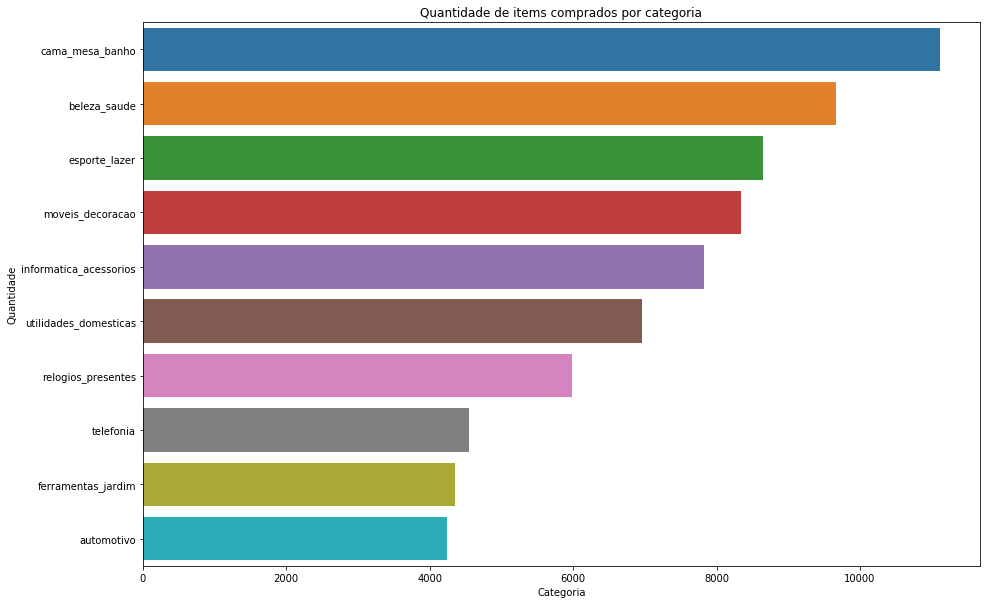

In [22]:
gp_compras = df_compras.groupby("product_category_name")["order_item_id"].count().reset_index()
plt.subplots(figsize=(15,10))
sns_blt = sns.barplot(
    y="product_category_name", 
    x='order_item_id', 
    data=gp_compras.sort_values(by="order_item_id", ascending=False).head(10)
)
sns_blt.set_title("Quantidade de items comprados por categoria")
plt.xlabel("Categoria")
plt.ylabel("Quantidade")
plt.show()

In [23]:
df_geo = pd.read_csv("olist_geolocation_dataset.csv")
df_geo = df_geo.groupby("geolocation_city").agg({"geolocation_lat":"mean","geolocation_lng":"mean"}).reset_index()
df_geo.columns = ["city","lat","long"]

In [24]:
df_costumers = pd.read_csv("olist_customers_dataset.csv")

In [25]:
geo_costumers = df_costumers.groupby("customer_city")["customer_id"].count().reset_index()
geo_costumers = pd.merge(geo_costumers,df_geo,how="left",left_on="customer_city",right_on="city")
geo_costumers = geo_costumers[['lat','long']]
geo_costumers.dropna(inplace=True)

In [27]:
print("Mapa de calor dos clientes de e-commerce no Brasil")
coordenadas = geo_costumers[['lat','long']]
m = folium.Map(location=[-16.1237611, -59.9219642], zoom_start=4)
hm_wide = plugins.HeatMap( 
    list(zip(coordenadas["lat"].values, coordenadas["long"].values)),
    min_opacity=0.2,
    radius=3, blur=5,
    max_zoom=1 
)
m.add_child(hm_wide)
m

Mapa de calor dos clientes de e-commerce no Brasil


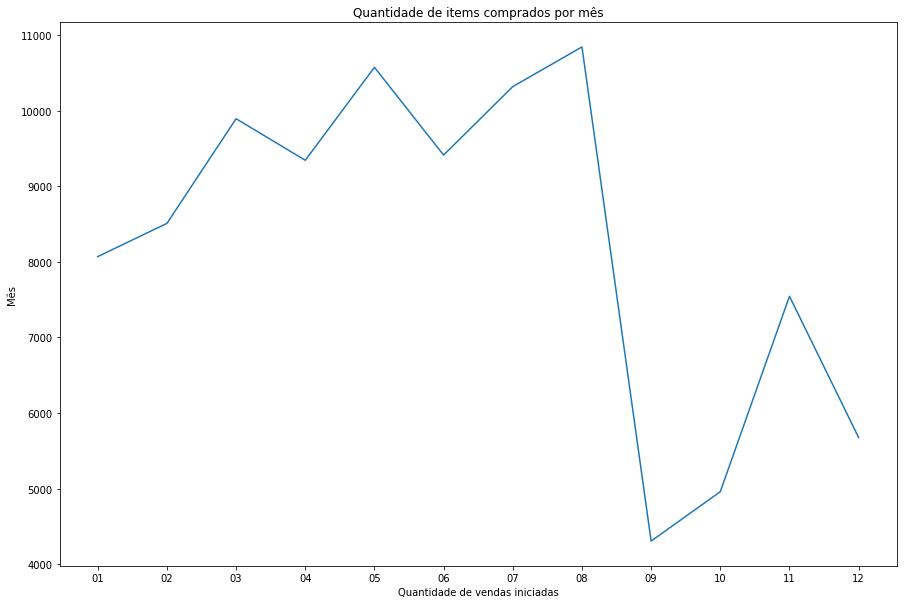

In [11]:
df_order_mes = df_orders
df_order_mes["mes"] = df_orders["order_purchase_timestamp"].apply(lambda x: str(x)[5:7])
df_order_mes = df_order_mes.groupby("mes")["order_id"].count().reset_index()

plt.subplots(figsize=(15,10))
sns_blt = sns.lineplot(
    y="order_id", 
    x='mes', 
    data=df_order_mes
)
sns_blt.set_title("Quantidade de items comprados por mês")
plt.xlabel("Quantidade de vendas iniciadas")
plt.ylabel("Mês")
plt.show()

In [12]:
df_pagamentos = pd.read_csv("olist_order_payments_dataset.csv")

In [13]:
df_tipo_pagamentos = df_orders[df_orders["order_status"] == "delivered"]
df_tipo_pagamentos= pd.merge(df_tipo_pagamentos,df_pagamentos,how="left",left_on="order_id",right_on="order_id")
df_tipo_pagamentos = df_tipo_pagamentos.groupby("payment_type")["order_id"].count().reset_index()

Tipos de pagamento mais utilizados


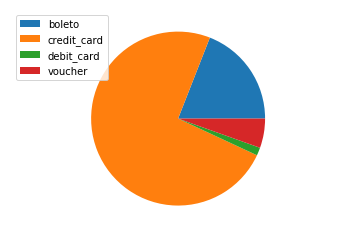

In [14]:
print("Tipos de pagamento mais utilizados")
plt.axis('equal');
plt.pie(df_tipo_pagamentos["order_id"]);
plt.legend(df_tipo_pagamentos["payment_type"])
plt.show()

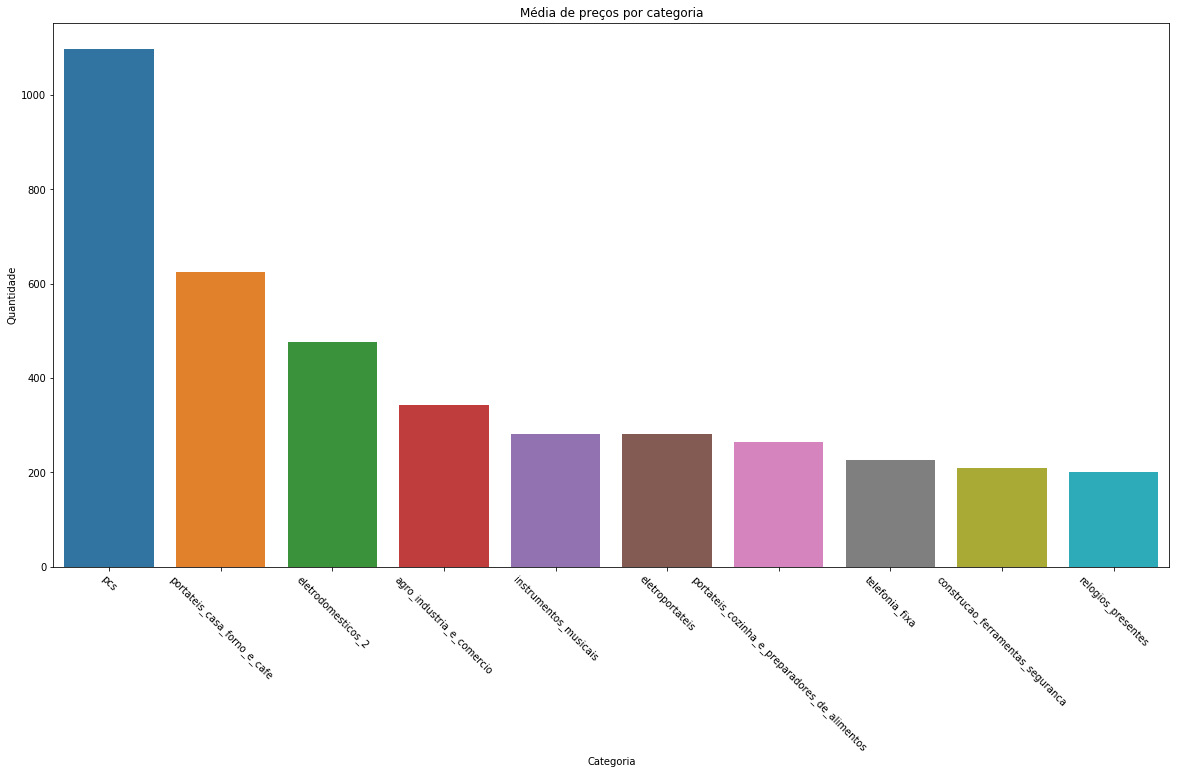

In [15]:
df_avg_category = pd.merge(df_items,df_products, how="left",left_on="product_id",right_on="product_id")
df_avg_category.dropna(inplace=True,subset=["product_category_name"])
df_avg_category = df_avg_category.groupby("product_category_name").agg({"price":"mean"}).reset_index().sort_values(by="price",ascending=False)

plt.subplots(figsize=(20,10))
sns_blt = sns.barplot(
    y="price", 
    x='product_category_name', 
    data=df_avg_category.head(10)
)
sns_blt.set_title("Média de preços por categoria")
plt.xticks(rotation=315)
plt.xlabel("Categoria")
plt.ylabel("Quantidade")
plt.show()